## Pedro Gabriel Fonseca

Neste projeto, você responderemos a um conjunto de perguntas feitas a dois conjuntos de dados: 
(Ideia do exercício projetado com ajuda do CHATGPT para meu estudo pessoal)
1. [Obesity among adults by country, 1975-2016](https://www.kaggle.com/amanarora/obesity-among-adults-by-country-19752016/)
2. [GDP Per Person (1901-2011)](https://www.kaggle.com/divyansh22/gdp-per-person-19012011?select=GDP.csv)

Tais conjuntos de dados são públicos foram publicados no Kaggle. Mais instruções sobre cada um deles podem ser encontrados nos links acima. Você também os encontrará na pasta `Datasets`, dentro de nossas apostilas.

In [177]:
import pandas as pd
import numpy as np

## Perguntas - Obesity among adults by country, 1975-2016

In [178]:
df_obesity = pd.read_csv("/Users/pedrogab/Documents/ASIMOV/Analisando Dados com Pandas & SQL/Analisando Dados com Pandas & SQL/projetos/analise-de-obesidade-e-pib-per-capita/Datasets/obesity_cleaned.csv")


In [179]:
df_obesity.columns

Index(['Unnamed: 0', 'Country', 'Year', 'Obesity (%)', 'Sex'], dtype='object')

- Limpe os dados do DataFrame, criando uma coluna de nome 'Obesity' que conterá os valores de obesidade. Transforme em float as colunas que porventura foram importadas como string.

In [180]:
del df_obesity["Unnamed: 0"]
df_obesity["Obesity"] = df_obesity["Obesity (%)"].apply(lambda x: x.split(" ")[0])

df_obesity.loc[df_obesity["Obesity"] == "No", "Obesity"] = np.nan
df_obesity.dropna(inplace=True)

In [181]:
df_obesity["Obesity"] = df_obesity["Obesity"].apply(lambda x: float(x))
df_obesity["Year"] = df_obesity["Year"].apply(lambda x: int(x))
df_obesity.set_index("Year" ,inplace=True)

- Qual o percentual médio de obesidade por sexo no mundo no ano de 2015?

In [187]:
df_obesity[df_obesity.index == 2015].groupby("Sex").mean(numeric_only=True)


,Obesity
Sex,
Both sexes,19.508377
Female,22.899476
Male,15.980628


- Quais são os 5 países com a maior e a menor taxa de aumento nos índices de obesidade no período observado?

In [189]:
df_obesity_start = df_obesity[df_obesity.index== 1975]
df_obesity_end = df_obesity[df_obesity.index== 2016]

In [191]:
df_obesity_start.set_index("Country", inplace=True)
df_obesity_end.set_index("Country", inplace=True)

In [ ]:
df_obesity_ev = df_obesity_end[df_obesity_end["Sex"] == "Both sexes"]["Obesity"] - df_obesity_start[df_obesity_start["Sex"] == "Both sexes"]["Obesity"]

In [198]:
df_obesity_ev.sort_values().head(5)
df_obesity_ev.sort_values().tail(5)

Country
Cook Islands    27.9
Tonga           28.3
Kiribati        30.1
Niue            31.1
Tuvalu          33.7
Name: Obesity, dtype: float64

- Quais os países com maiores e menores níveis percetuais de obesidade em 2015?

In [199]:
df_2015 = df_obesity[df_obesity.index == 2015]



In [202]:
df_2015[df_2015["Obesity"]== df_2015["Obesity"].max()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Nauru,63.1 [55.5-70.3],Female,63.1


In [203]:
df_2015[df_2015["Obesity"]== df_2015["Obesity"].min()]

,Country,Obesity (%),Sex,Obesity
Year,,,,
2015,Viet Nam,1.5 [0.8-2.5],Male,1.5


- Qual a diferença média percentual de obesidade entre sexos ao longo dos anos para o Brasil?

In [212]:
df_brasil = df_obesity[df_obesity["Country"]== "Brazil"]

<Axes: xlabel='Year'>

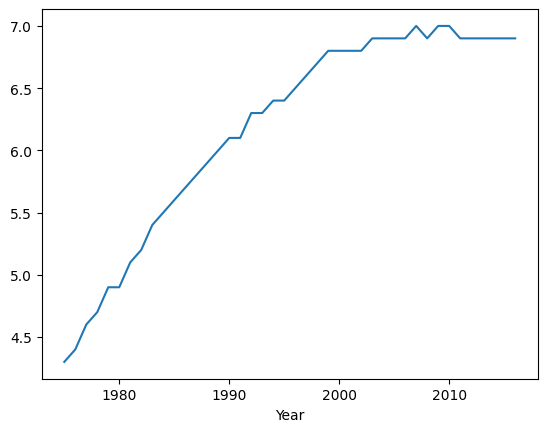

In [215]:
(df_brasil[df_brasil["Sex"]=="Female"]["Obesity"] - df_brasil[df_brasil["Sex"]=="Male"]["Obesity"]).plot()

- Você conseguiria plotar um gráfico mostrando a evolução da obesidade para ambos sexos no mundo?

In [ ]:
df_both = df_obesity[df_obesity["Sex"]=="Both sexes"]

,Country,Obesity (%),Sex,Obesity
Year,,,,
1975,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1976,Afghanistan,0.5 [0.2-1.1],Both sexes,0.5
1977,Afghanistan,0.6 [0.2-1.2],Both sexes,0.6
1978,Afghanistan,0.6 [0.2-1.3],Both sexes,0.6
1979,Afghanistan,0.6 [0.3-1.3],Both sexes,0.6
...,...,...,...,...
2012,Zimbabwe,14.3 [11.4-17.6],Both sexes,14.3
2013,Zimbabwe,14.6 [11.5-18.0],Both sexes,14.6
2014,Zimbabwe,14.9 [11.7-18.4],Both sexes,14.9


<Axes: xlabel='Year'>

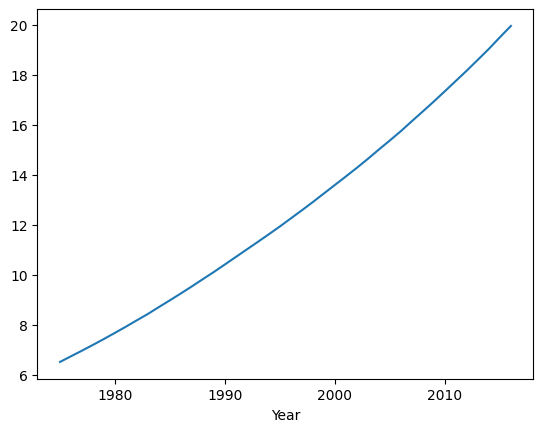

In [219]:
(df_both.groupby("Year")["Obesity"].mean()).plot()

## Perguntas - GDP Per Person (1901-2011)

In [182]:
df_gdp = pd.read_csv("Datasets/GDP.csv", decimal=".")

In [221]:
df_gdp

,Country,Region,Year,GDP_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1/1/1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1/1/1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1/1/1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,1/1/2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,1/1/2006,520.17


- Limpe o conjunto de dados, convertendo strings em datas ou float, quando necessário.

In [228]:
df_gdp["Year"] = df_gdp["Year"].apply(lambda x: int(x.split("/")[-1]))

In [238]:
float(df_gdp[" GDP_pp "].iloc[0].split()[0])

613.99

In [240]:
df_gdp["gdp_pp"] = df_gdp[" GDP_pp "].apply(lambda x: float(x.split()[0].replace(",","")))

In [ ]:
del df_gdp[" GDP_pp "]

In [242]:
df_gdp

,Country,Region,Year,gdp_pp
0,Afghanistan,"Middle East, North Africa, and Greater Arabia",1901,613.99
1,Afghanistan,"Middle East, North Africa, and Greater Arabia",1906,624.04
2,Afghanistan,"Middle East, North Africa, and Greater Arabia",1911,634.25
3,Afghanistan,"Middle East, North Africa, and Greater Arabia",1916,647.28
4,Afghanistan,"Middle East, North Africa, and Greater Arabia",1921,662.40
...,...,...,...,...
4414,Zimbabwe,Sub-Saharan Africa,1991,782.09
4415,Zimbabwe,Sub-Saharan Africa,1996,781.50
4416,Zimbabwe,Sub-Saharan Africa,2001,719.96
4417,Zimbabwe,Sub-Saharan Africa,2006,520.17


- Você conseguiria informar o primeiro valor registrado de cada país?

In [245]:
df_gdp.groupby("Country")["Year"].min()

Country
Afghanistan    1901
Albania        1901
Algeria        1901
Andorra        1901
Angola         1901
               ... 
Venezuela      1901
Vietnam        1901
Yemen, Rep.    1901
Zambia         1901
Zimbabwe       1901
Name: Year, Length: 193, dtype: int64

In [248]:
df_gdp.groupby("Country")["Year"].min()[df_gdp.groupby("Country")["Year"].min()==1991]

Country
Kosovo    1991
Name: Year, dtype: int64

- Informe as regiões com maiores crescimentos de PIB per capita no século passado.

In [251]:
df_gdp_start = df_gdp[df_gdp["Year"] == 1901]
df_gdp_end = df_gdp[df_gdp["Year"] == 1996]


In [253]:
df_gdp_end.groupby("Region")["gdp_pp"].mean() / df_gdp_start.groupby("Region")["gdp_pp"].mean()

Region
Asia                                             8.117615
Australia and Oceania                            4.960754
Central America and the Caribbean                5.064268
Europe                                           6.940462
Middle East, North Africa, and Greater Arabia    9.572159
North America                                    6.897602
South America                                    4.121237
Sub-Saharan Africa                               3.486338
Name: gdp_pp, dtype: float64

- Preecha os anos ausentes em cada país com uma estimativa, baseada na diferença entre o próximo registro e o anterior.

In [258]:
arr_year = np.arange(df_gdp["Year"].min(), df_gdp["Year"].max())
df_all_years = pd.DataFrame(arr_year, columns=["Year"])
df_all_years.index = df_all_years["Year"]

df_years_off = df_all_years["Year"].isin(df_gdp["Year"])

In [259]:
df_all_years


,Year
Year,
1901,1901
1902,1902
1903,1903
1904,1904
1905,1905
...,...
2006,2006
2007,2007
2008,2008
